In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
digits = tf.keras.datasets.mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = digits.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
len(train_labels)

60000

In [9]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

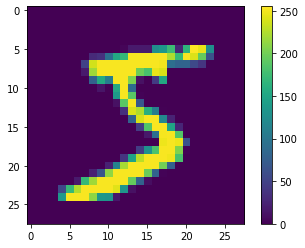

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

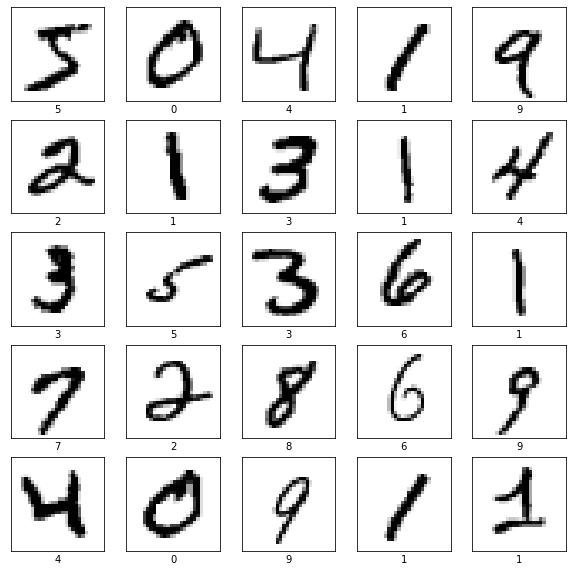

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2504 - accuracy: 0.9286
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1093 - accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0751 - accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0564 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0433 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0342 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0187 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0928 - accuracy: 0.9773

Test accuracy: 0.9772999882698059


In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

In [21]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

array([1.5169443e-13, 7.8647343e-13, 1.2331024e-09, 1.7171020e-06,
       1.8818635e-13, 4.9034505e-12, 5.5026437e-16, 9.9999833e-01,
       1.2993952e-10, 2.3539659e-09], dtype=float32)

In [23]:
np.argmax(predictions[0])

7

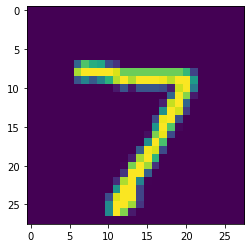

In [24]:
plt.figure()
plt.imshow(test_images[0])

In [38]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


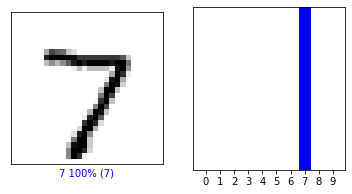

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


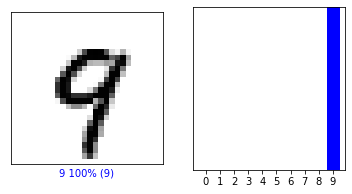

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


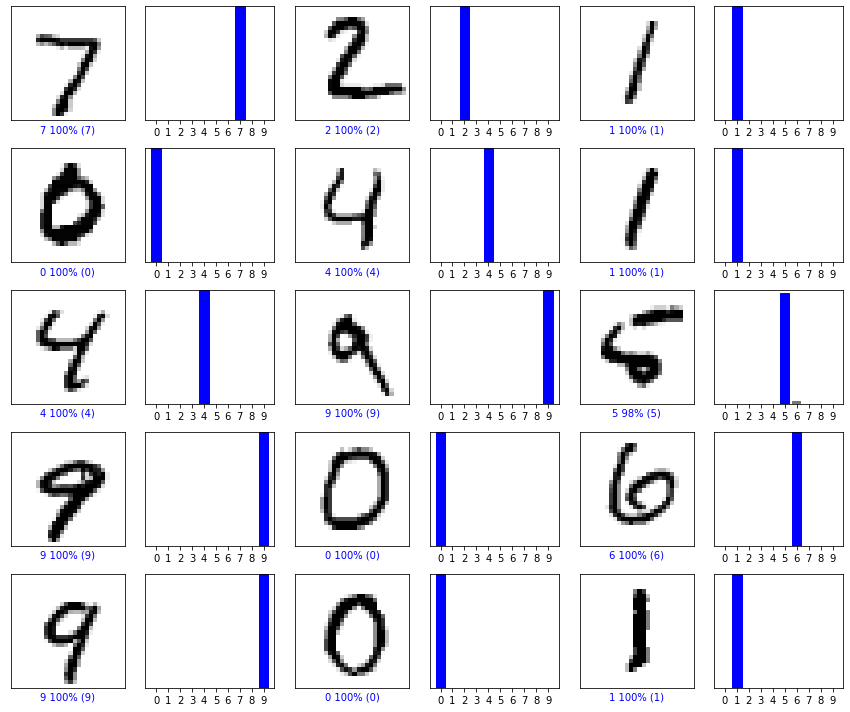

In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [42]:
img = test_images[1]

print(img.shape)


(28, 28)


In [43]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [44]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.7350196e-14 4.4507573e-07 9.9999952e-01 5.0144511e-10 1.2316115e-24
  2.0912410e-12 4.7153145e-14 3.0229296e-17 5.8621792e-12 2.2896388e-18]]


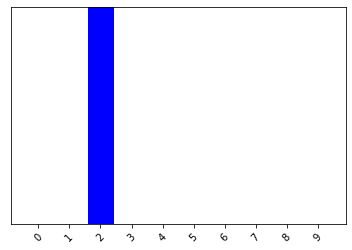

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [46]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)